# <center>实验二：线性模型之线性回归

### 一、实验目的


掌握线性回归分析方法，具体包括 ：
- 掌握线性回归模型的基本原理； 
- 代码实现梯度下降法求解线性回归的模型参数；
- 了解线性回归模型的性能评价指标

### 二、实验类型

验证与设计型

### 三、实验原理

#### 1. 线性回归的基本形式


给定m个样本的数据集$D = {(\textbf{x}_1,y_1),(\textbf{x}_2,y_2),...,(\textbf{x}_m,y_m)}$，
其中，样本$\textbf{x}_i = (x_1;x_2;...;x_d)\in R^d$有$d$个不同属性，标签$y\in R$。
线性回归模型

<center> $f(\textbf{x}) = \textbf{w}^T\textbf{x}+b$ 
    
试图通过学习合适的参数$\textbf{w}\in R^d$与$b\in R$，使得模型$f(\textbf{x}_i)$的输出结果可以尽可能准确地拟合标签$y_i$

#### 2. 最小二乘法


最小二乘法基于最小化均方误差的思想来求解模型参数，损失函数为

<center>$L = \frac{1}{m}\sum_{i=1}^m(f(\textbf{x}_i)-y_i)^2$ 

其中，$\textbf{x}_i\in R^{d},y_i\in R$是第$i$个样本的数据与标签， $f(\textbf{x}_i) = \textbf{w}^T\textbf{x}_i+b$ 是线性回归模型关于数据$\textbf{x}_i$的预测，由参数$\textbf{w}$、$b$决定，即寻找最优的参数$\textbf{w}^*$、$b^*$，使得所有样本的均方误差之和最小：
    
<center> ${\textbf{w}^*, \ b^*} = \arg\min_{\textbf{w}, \ b} \quad \frac{1}{m}\sum_{i=1}^m(\textbf{w}^T\textbf{x}_i+b-y_i)^2$

#### 3. 梯度下降法

可以利用梯度下降法求解最小二乘问题，梯度下降法步骤如下：
- 随机初始化参数$\textbf{w}^0$  
- **for** t = 1,...,T, **do**: \
&emsp;
    $\textbf{w}^t = \textbf{w}^{t-1} - \eta\nabla_{\textbf{w}} L$ \
&emsp;
    $ b^t = {b}^{t-1} - \eta\nabla_{b} L$

其中，$\eta$是学习率，一般取$0.1$左右，
<center>$\nabla_{\textbf{w}} L=\frac{2}{m}\sum_{i=1}^m (\textbf{w}^T\textbf{x}_i+b-y_i)\textbf{x}_i$ 
    
<center>$\nabla_{b} L=\frac{2}{m}\sum_{i=1}^m (\textbf{w}^T\textbf{x}_i+b-y_i)$

分别是损失函数$L$关于参数$\textbf{w}$、$b$的梯度

### 四、实验仪器与设备

台式机/笔记本电脑，内存至少8G，硬盘至少250G

### 五、实验内容与步骤

#### 1. 导入python工具包

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### 2. 数据生成

In [82]:
pip install pandas

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


随机生成120个样本的数据集，为方便可视化，这里取维度$d=1$，并取前100个样本为训练集，后20个样本为测试集

In [83]:
np.random.seed(26) # 随机种子，控制生成的数据
X = 2 * np.random.rand(120, 1)
y = 4 + 3 * X + np.random.randn(120, 1)

数据可视化

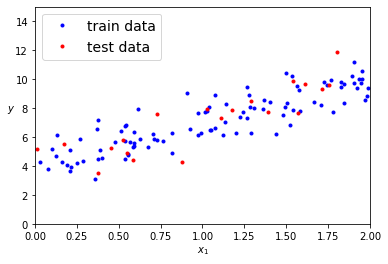

In [84]:
plt.plot(X[:100], y[:100], "b.", label = 'train data') # 蓝点-训练数据
plt.plot(X[100:], y[100:], "r.", label = 'test data') # 红点-测试数据
plt.xlabel("$x_1$") # x-横轴
plt.ylabel("$y$", rotation=0) # y-纵轴
plt.legend(loc="upper left", fontsize=14) # 图例
plt.axis([0, 2, 0, 15]) # 画图范围区间
plt.show()

#### 3. sklearn工具包求解模型最优参数

机器学习工具包sklearn中有直接求解线性回归问题的模型，具体调用如下

In [85]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X[:100], y[:100]) # 利用训练数据求解模型参数
w_best, b_best = lin_reg.coef_, lin_reg.intercept_ # 分别对应参数w,b
print("w_best = ",w_best,"\nb_best = ",b_best)

w_best =  [[2.87243541]] 
b_best =  [4.10572572]


基于两点可以确定一条直线，绘制线性回归模型,

In [86]:
X_new = np.array([[2],[0]])
y_predict = X_new * w_best + b_best
y_predict

array([[9.85059654],
       [4.10572572]])

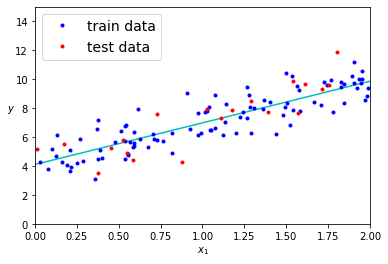

In [42]:
plt.plot(X_new, y_predict, "c-")
plt.plot(X[:100], y[:100], "b.", label = 'train data')
plt.plot(X[100:], y[100:], "r.", label = 'test data')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

线性回归模型如青色直线所示，可以较好的拟合训练数据

#### 4. 课堂练习：梯度下降法求解最优参数

In [43]:
eta = 0.1  # 学习率
T = 1000  # 迭代次数
m = 100  # 训练样本个数

In [44]:
def gd(m, eta = 0.1, T = 1000):
    w,b = np.random.randn(2,1)
    
    for t in range(T):
        grad_w,grad_b=0,0
        for i in range(m):
            grad_w+=2/m*(w*X[i]+b-y[i])*X[i]
            grad_b+=2/m*(w*X[i]+b-y[i])
        w=w-eta*grad_w
        b=b-eta*grad_b  
        
    return w,b

<font color="#dd0000">**学生自行代码实现，要求返回结果w,b与sklearn工具包计算结果一致**</font><br /> 

In [45]:
w,b = gd(100,0.1,1000)
print("w = ",w,"\nb = ",b)

w =  [2.87243541] 
b =  [4.10572572]


#### 5. 性能度量

In [46]:
# 定义预测函数
def predict(x_new,w,b):
    return w*x_new + b

#####  I. 计算当前参数下线性回归在训练集与测试集上的损失函数 
- 训练集

In [47]:
m = 100
MSE_train = 0
for i in range(m):
    MSE_train += (w*X[i] + b - y[i])**2 # 累加每个样本的均方误差
MSE_train = MSE_train/m

print("训练集均方误差：", MSE_train)    

训练集均方误差： [0.86987484]


- 测试集

In [48]:
m = 20
MSE_test = 0
for i in range(m):
    MSE_test += (w*X[100+i] + b - y[100+i])**2
MSE_test = MSE_test/m

print("测试集均方误差：", MSE_test) 

测试集均方误差： [1.3261037]


#####  II. 学习曲线
随着训练样本个数的增加，线性模型在**训练集**和**验证集**上的均方误差

In [49]:
# 定义均方误差计算函数
def Mse(y,y_pred):
    m = len(y)
    mse = 0
    for i in range(m):
        mse += (y_pred[i] - y[i])**2
    return mse/m

In [50]:
#绘制学习曲线

<font color="#dd0000">**同学们自行代码实现，要求结果类似如下图所示，横坐标对应的是训练集样本个数，从1到100，纵坐标对应相应的均方误差**</font><br /> 

![绘制学习曲线](.\LearningCurves1.png)

可以看出，一开始当训练样本个数很小的时候，虽然训练集上的均方误差很小，但测试集上的均方误差很大，说明过拟合；\
随着训练集上的样本个数增加，虽然由于是线性模型无法完全拟合训练集上的所有样本，但测试集上的均方误差也随之减少

### 六、注意事项

如果电脑里没有相应python工具包，可以在Anaconda Powershell Prompt（或对应环境）中pip安装到相应工具包。
- 以机器学习工具包sklearn为例，其安装名为scikit-learn，可以在Anaconda Powershell Prompt中输入pip install scikit-learn安装对应工具包
![Anaconda安装sklearn](.\1.JPG)

In [51]:
pip install scikit-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


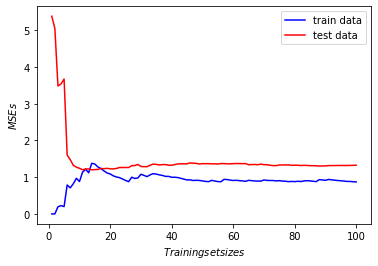

In [80]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
train=[]
test=[]
x=[]
for i in range(1,101):
    lin_reg.fit(X[:i], y[:i]) # 利用训练数据求解模型参数
    w_best, b_best = lin_reg.coef_, lin_reg.intercept_ # 分别对应参数w,b
    m=0
    for j in range(i):
        m+=(predict(X[j],w_best,b_best)-y[j])**2
    train.append((m/i)[0])
    m=0
    for j in range(20):
        m+=(predict(X[100+j],w_best,b_best)-y[100+j])**2
    test.append((m/20)[0])
for i in range(100):
        x.append(i+1)
plt.xlabel("$Training set sizes$") # x-横轴
plt.ylabel("$MSEs$") # y-纵轴  
plt.plot(x, train, "b",label = 'train data') 
plt.plot(x, test, "r",label = 'test data') 
plt.legend(loc="upper right", fontsize=10)
plt.show()
        
        
        